In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import json

In [2]:
def plot_results(accuracies, error_df, y_error, save=False, filename='accuracies'):
    y_labels = ['Test Accuracy', 'Training Accuracy']
    fig, axes = plt.subplots(2, 1, figsize=(8, 14))
    for i in range(2):
        axes[i].plot([0, 1, 2, 3, 4, 5, 6], accuracies[i][0], marker='o', linestyle=(0, (1, 1)))
        axes[i].plot([0, 1, 2, 3, 4, 5, 6], accuracies[i][1], marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)))
        sns.boxplot(x='k-mer', y=y_error[i], data=error_df[i], hue='model', ax=axes[i])
        axes[i].set_ylabel(y_labels[i])
        axes[i].set_xlabel('k-mer')
        axes[i].legend(loc='lower right')
    if save:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [3]:
def get_accuracy(data):
    mean_accs = {}
    for k in sorted(data):
        for model in data[k]: 
            mean_accs.setdefault(model, [])
            mean_accs[model].append(statistics.mean(data[k][model]) * 100)
    return mean_accs

In [4]:
def get_errors(data):
    error_scores = {}
    for k in data:
        for model in data[k]: 
            error_scores.setdefault(model, {})
            error_scores[model].setdefault(k, 0)
            error_scores[model][k] = data[k][model]
    return error_scores

In [5]:
def prepare_df(json):
    df_train = pd.DataFrame(columns=['Training Accuracy', 'model', 'k-mer'])
    df_test = pd.DataFrame(columns=['Test Accuracy', 'model', 'k-mer'])
    for model in sorted(json):
        if 'train' in model:
            for k in sorted(json[model]):
                for score in json[model][k]:
                    df_train.loc[len(df_train)] = [score*100, model[:-6], 'k=' + k[-1]]
        else:
            for k in sorted(json[model]):
                for score in json[model][k]:
                    df_test.loc[len(df_test)] = [score*100, model[:-5], 'k=' + k[-1]]
    return df_train, df_test

In [6]:
with open('../scores/hierarchical_f1_scores.json', 'r') as f1_scores:
    scores = json.load(f1_scores)
    h_scores = get_accuracy(scores)
    h_error = get_errors(scores)

In [7]:
train_error, test_error = prepare_df(h_error)

In [8]:
for i in train_error.index:
    if train_error.iloc[i, 1] == 'rf':
        train_error.iloc[i, 1] = 'hierarchicalRF'
    if test_error.iloc[i, 1] == 'rf':
        test_error.iloc[i, 1] = 'hierarchicalRF'
    if train_error.iloc[i, 1] == 'svm':
        train_error.iloc[i, 1] = 'hierarchicalSVM'
    if test_error.iloc[i, 1] == 'svm':
        test_error.iloc[i, 1] = 'hierarchicalSVM'

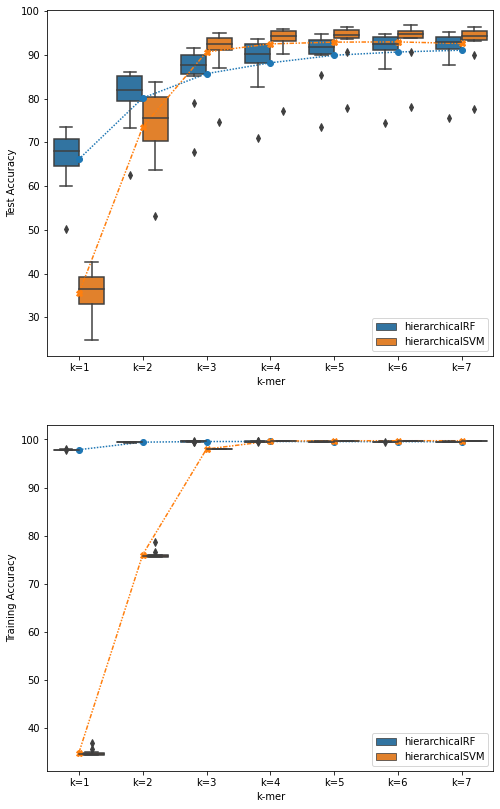

In [9]:
acc_list = [[h_scores['rf test'], h_scores['svm test']],
            [h_scores['rf train'], h_scores['svm train']]]
plot_results(acc_list, [test_error, train_error], ['Test Accuracy', 'Training Accuracy'], True, 'hierarchical_f1score')

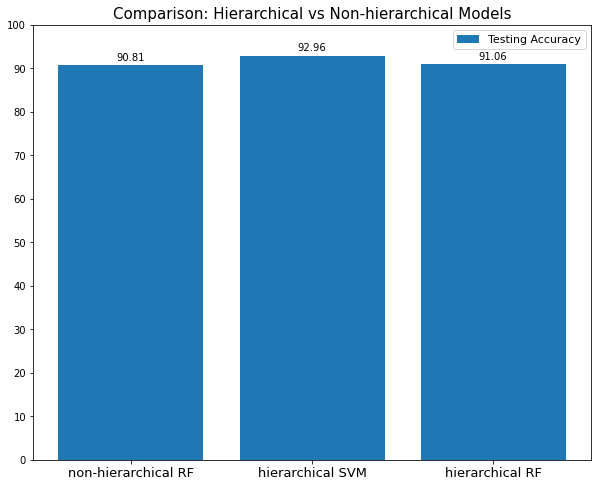

In [10]:
x = np.arange(3)
test_acc = [90.81, 92.96, 91.06]

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(x, test_acc, label='Testing Accuracy')
for i, v in enumerate(test_acc):
    plt.text(i-0.08, v+1, str(v))
    
plt.xticks(x, ('non-hierarchical RF', 'hierarchical SVM', 'hierarchical RF'), fontsize= 13)
plt.legend(prop={'size': 11})
plt.yticks(np.arange(0, 110, 10))
plt.title('Comparison: Hierarchical vs Non-hierarchical Models', {'fontsize': 15})
plt.savefig('hierarchical_score_chart', bbox_inches='tight', dpi=300)
plt.show()